In [2]:
import itertools
import os
import pickle
import random
import re
import subprocess
from typing import List, Tuple

import IPython.display
from matplotlib.axes import Axes
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.patches import Rectangle

pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 200

# Reading

In [3]:
RUNDIRS = '../logs/rundirs'
  
# RUNNAME = '20241203_133243' 

# RUNNAME = '20241203_170129_all600'
# RUNNAME = '20241213_104400_racing'
# RUNNAME = '20241214_122216_racing_passhum'
# RUNNAME = '20241221_161344_rerouting_racing_passhum'
# RUNNAME = '20241222_105140_rerouting_racing_passhum'
# RUNNAME = '20241226_130310'
# RUNNAME = '20241226_161338'
# RUNNAME = '20241227_081741'
# RUNNAME = '20241228_073951'
# RUNNAME = '20241228_174447'
# RUNNAME = '20241229_131008'
RUNNAME = '20241230_173555'
# RUNNAME = '20241231_183022'

I_MAP = 1

In [4]:
if RUNNAME == '20241203_170129_all600':
    RUNNAME_LINEARIZATIONS = '20241212_114658_lin_abcd'
else:
    RUNNAME_LINEARIZATIONS = None

if RUNNAME == '20241230_173555':
    RUNNAME_EXTRA = '20241231_183022'
else:
    RUNNAME_EXTRA = None

RUNDIR = f'{RUNDIRS}/{RUNNAME}'

DIRECTORY_DATA = f'data/{RUNNAME}'
os.makedirs(DIRECTORY_DATA, exist_ok=True)

def read_df_runname(rundir):
    filename = f'{rundir}/sorted.csv'
    if not os.path.exists(filename) or os.path.getmtime(filename) < os.path.getmtime(rundir):
        subprocess.run(['./consolidate.py', rundir], check=True)
    df_orig = pd.read_csv(filename)
    return df_orig

df_orig_with_bad = read_df_runname(RUNDIR)
df_orig_with_bad

,Date,Scenario ID,Vehicle ID,Vehicle type,Cycle distance (m),No. of completed missions,Total distance traveled (m),No. of stops,No. of forcing events,No. of violations,No. of critical sections,No. of near-misses,No. of collisions,Is blocked,Total waiting time (s),Maximum waiting time (s),Total time (s),Maximum acceleration (m/s^2),Maximum speed (m/s),Average speed (m/s),Scenario,Current datetime,Time passed (real),Time passed (sim.),isCanPassFirstActive,isRacingThroughCrossroadAllowed,probabilitySlowingDownForHuman,Human V0,Collision events,Vehicle size (m),v_current,v_max,can pass first,violation of priorities,moving slowly,improper parking,cautious mode,reroutings at parked / slow,moving backwards,change of priorities,stops,violations,near misses,collisions,"traveled total, m",no. missions,blocked,"position (x, y), m","traveled, m",path index,no. poses,CP (index),"posTo Slow, m","distance ToCP, m",status,future missions,Linearization A,Linearization B,Linearization C,Linearization D1,Linearization D2,Linearization D3,Linearization D0
0,20241230_163606,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario5-1.json, passhum 0, slowness no, forcing no",0,HumanDrivenVehicle,627.44,7,4391.0,20,0,0,76,0,2,0,761.7,212.2,1799.9,0.3,5.6,2.4,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario5-1.json, passhum 0, slowness no, forcing no",2024-12-30 16:40:11,0:04:04,0:29:59 (x7.4),"hum=false, aut=false",True,0.0,0 forcing events,"0 minor, 2 major (0:09:12: V0[163]-V3[671], 0:24:10: V0[39]-V3[801])","[length=10.0, width=10.0, safe distance: front=5.0, back=5.0, left=1.0, right=1.0]",1.7,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,2,4390.2,7,NaN,"(205.8, 168.4)",4.9,4.0,626,NaN,594.9,NaN,DRIVING,"2: [627, 626]",0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,NaN
1,20241230_163606,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario5-1.json, passhum 0, slowness no, forcing no",1,AutonomousVehicle,420.84,9,8106.9,21,0,0,39,0,0,0,24.0,12.6,1799.9,0.3,5.6,4.5,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario5-1.json, passhum 0, slowness no, forcing no",2024-12-30 16:40:11,0:04:04,0:29:59 (x7.4),"hum=false, aut=false",True,0.0,0 forcing events,"0 minor, 2 major (0:09:12: V0[163]-V3[671], 0:24:10: V0[39]-V3[801])","[length=10.0, width=10.0, safe distance: front=5.0, back=5.0, left=1.0, right=1.0]",5.6,5.6,NaN,NaN,NaN,NaN,NaN,- / -,NaN,NaN,NaN,NaN,0,0,8104.6,9,NaN,"(191.4, 258.6)",547.4,546.0,841,NaN,808.9,NaN,DRIVING,1: [841],0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000

In [5]:
if RUNNAME_EXTRA is not None:
    df_extra = read_df_runname(f'{RUNDIRS}/{RUNNAME_EXTRA}')
    df_orig_with_bad = pd.concat([df_orig_with_bad, df_extra])
    IPython.display.display(df_orig_with_bad)

,Date,Scenario ID,Vehicle ID,Vehicle type,Cycle distance (m),No. of completed missions,Total distance traveled (m),No. of stops,No. of forcing events,No. of violations,No. of critical sections,No. of near-misses,No. of collisions,Is blocked,Total waiting time (s),Maximum waiting time (s),Total time (s),Maximum acceleration (m/s^2),Maximum speed (m/s),Average speed (m/s),Scenario,Current datetime,Time passed (real),Time passed (sim.),isCanPassFirstActive,isRacingThroughCrossroadAllowed,probabilitySlowingDownForHuman,Human V0,Collision events,Vehicle size (m),v_current,v_max,can pass first,violation of priorities,moving slowly,improper parking,cautious mode,reroutings at parked / slow,moving backwards,change of priorities,stops,violations,near misses,collisions,"traveled total, m",no. missions,blocked,"position (x, y), m","traveled, m",path index,no. poses,CP (index),"posTo Slow, m","distance ToCP, m",status,future missions,Linearization A,Linearization B,Linearization C,Linearization D1,Linearization D2,Linearization D3,Linearization D0
0,20241230_163606,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario5-1.json, passhum 0, slowness no, forcing no",0,HumanDrivenVehicle,627.44,7,4391.0,20,0,0,76,0,2,0,761.7,212.2,1799.9,0.3,5.6,2.4,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario5-1.json, passhum 0, slowness no, forcing no",2024-12-30 16:40:11,0:04:04,0:29:59 (x7.4),"hum=false, aut=false",True,0.0,0 forcing events,"0 minor, 2 major (0:09:12: V0[163]-V3[671], 0:24:10: V0[39]-V3[801])","[length=10.0, width=10.0, safe distance: front=5.0, back=5.0, left=1.0, right=1.0]",1.7,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,2,4390.2,7,NaN,"(205.8, 168.4)",4.9,4.0,626,NaN,594.9,NaN,DRIVING,"2: [627, 626]",0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,NaN
1,20241230_163606,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario5-1.json, passhum 0, slowness no, forcing no",1,AutonomousVehicle,420.84,9,8106.9,21,0,0,39,0,0,0,24.0,12.6,1799.9,0.3,5.6,4.5,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario5-1.json, passhum 0, slowness no, forcing no",2024-12-30 16:40:11,0:04:04,0:29:59 (x7.4),"hum=false, aut=false",True,0.0,0 forcing events,"0 minor, 2 major (0:09:12: V0[163]-V3[671], 0:24:10: V0[39]-V3[801])","[length=10.0, width=10.0, safe distance: front=5.0, back=5.0, left=1.0, right=1.0]",5.6,5.6,NaN,NaN,NaN,NaN,NaN,- / -,NaN,NaN,NaN,NaN,0,0,8104.6,9,NaN,"(191.4, 258.6)",547.4,546.0,841,NaN,808.9,NaN,DRIVING,1: [841],0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000...,0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000

In [6]:
if 'Linearization C' not in df_orig_with_bad.columns:
    df_orig = df_orig_with_bad
else:
    series_bad = pd.isna(df_orig_with_bad['Linearization C'])
    IPython.display.display(df_orig_with_bad[series_bad])
    df_orig = df_orig_with_bad[~series_bad]

,Date,Scenario ID,Vehicle ID,Vehicle type,Cycle distance (m),No. of completed missions,Total distance traveled (m),No. of stops,No. of forcing events,No. of violations,No. of critical sections,No. of near-misses,No. of collisions,Is blocked,Total waiting time (s),Maximum waiting time (s),Total time (s),Maximum acceleration (m/s^2),Maximum speed (m/s),Average speed (m/s),Scenario,Current datetime,Time passed (real),Time passed (sim.),isCanPassFirstActive,isRacingThroughCrossroadAllowed,probabilitySlowingDownForHuman,Human V0,Collision events,Vehicle size (m),v_current,v_max,can pass first,violation of priorities,moving slowly,improper parking,cautious mode,reroutings at parked / slow,moving backwards,change of priorities,stops,violations,near misses,collisions,"traveled total, m",no. missions,blocked,"position (x, y), m","traveled, m",path index,no. poses,CP (index),"posTo Slow, m","distance ToCP, m",status,future missions,Linearization A,Linearization B,Linearization C,Linearization D1,Linearization D2,Linearization D3,Linearization D0
3112,20250101_112132,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario2-3.json, passhum 1, slowness with rerouting, forcing change of priorities",0,HumanDrivenVehicle,587.23,0,450.0,0,1,1,15,0,0,0,0.8,0.8,448.0,0.3,1.0,1.0,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario2-3.json, passhum 1, slowness with rerouting, forcing change of priorities",2025-01-01 11:22:43,0:01:10,0:07:28 (x6.4),"hum=true, aut=false",True,0.0,1 forcing events,"0 minor, 0 major","[length=10.0, width=10.0, safe distance: front=5.0, back=5.0, left=1.0, right=1.0]",1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0,450.0,0,NaN,"(352.0, 111.0)",450.0,449.0,587,NaN,586.1,NaN,DRIVING,"2: [586, 587]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3113,20250101_112132,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario2-3.json, passhum 1, slowness with rerouting, forcing change of priorities",1,AutonomousVehicle,235.30,2,988.5,6,0,0,13,0,0,1,183.9,167.2,448.0,0.3,5.6,2.2,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario2-3.json, passhum 1, slowness with rerouting, forcing change of priorities",2025-01-01 11:22:43,0:01:10,0:07:28 (x6.4),"hum=true, aut=false",True,0.0,1 forcing events,"0 minor, 0 major","[length=10.0, width=10.0, safe distance: front=5.0, back=5.0, left=1.0, right=1.0]",0.0,5.6,NaN,NaN,NaN,NaN,NaN,0 / 0,NaN,NaN,NaN,NaN,0,0,988.5,2,0:02:47,"(335.7, 129.9)",50.8,50.0,469,51,32.0,2.0,STOP@CP,1: [469],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3114,20250101_112132,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario2-3.json, passhum 1, slowness with rerouting, forcing change of priorities",2,AutonomousVehicle,417.37,1,1216.6,4,0,0,11,0,0,0,162.7,136.0,448.0,0.3,5.6,2.7,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario2-3.json, passhum 1, slowness with rerouting, forcing change of priorities",2025-01-01 11:22:43,0:01:10,0:07:28 (x6.4),"hum=true, aut=false",True,0.0,1 forcing events,"0 minor, 0 major","[length=10.0, width=10.0, safe distance: front=5.0, back=5.0, left=1.0, right=1.0]",5.6,5.6,NaN,NaN,NaN,NaN,NaN,0 / 0,NaN,NaN,NaN,NaN,0,0,1216.6,1,NaN,"(480.1, 100.1)",383.6,383.0,833,416,385.9,0.0,DRIVING,1: [833],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3115,20250101_112132,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario2-3.json, passhum 1, slowness with rerouting, forcing change of priorities",3,AutonomousVehicle,2319.91,0,1420.3,6,0,0,11,0,0,0,32.1,13.5,448.0,0.3,5.6,3.2,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario2-3.json, passhum 1, slowness with rerouting, forcing change of priorities",2025-01-01 11:22:43,0:01:10,0:07:28 (x6.4),"hum=true, aut=false",True,0.0,1 forcing events,"0 minor, 0 major","[length=10.0, width=10.0, safe distance: front=5.0, back=5.0, left=1.0, right=1.0]",0.0,5.6,NaN,NaN,NaN,NaN,NaN,0 / 2,NaN,NaN,NaN,NaN,0,0,1420.3,0,NaN,"(687.0, 535.1)",1420.3,1420.0,1422,NaN,138

In [7]:
def normalize_linearization(lin):
    if lin is None:
        return None
    return tuple(
        np.interp(
            np.linspace(0, 1, 100),
            np.linspace(0, 1, len(lin)), 
            lin
        )
    )


# Function to combine tuples into a tuple of small tuples
def combine_tuples(cols, row):
    # Extract the relevant columns from the row
    selected = [row[col] for col in cols]
    assert len(selected) > 1
    assert sum(c is None for c in selected) == 1, (cols, row)  # .to_dict())
    # Replace None with tuples of Nones based on the size of the first non-None tuple
    tuples = [col 
              if col is not None else 
              (None,) * len(next(c for c in selected if c is not None)) 
              for col in selected]
    # Combine using zip
    return tuple(zip(*tuples))


COLUMNS_CONFIGURATION = ['i_map', 'are_bridges', 'position']
COLUMNS_PARAMS = ['passhum', 'slowness', 'forcing']
COLUMNS_SCENARIO = COLUMNS_CONFIGURATION + COLUMNS_PARAMS

def normalize_df(df_orig):
    df_id_pre = df_orig['Scenario ID'].str.extract(r'^(?P<filename>.*?)(?P<params>, .*)$', expand=True)

    df_params = pd.concat([
        df_id_pre['params'].str.extract(r', passhum (?P<passhum>0|1)\b', expand=True).astype(int).astype(bool),
        df_id_pre['params'].str.extract(r', slowness (?P<slowness>[^,]+)\b', expand=True),
        df_id_pre['params'].str.extract(r', forcing (?P<forcing>[^,]+)\b', expand=True),
    ], axis=1)
    assert list(df_params.columns) == COLUMNS_PARAMS  # TODO: set `COLUMNS_PARAMS`
    
    df_id = pd.concat([
        df_id_pre[['filename']],
        df_id_pre['filename'].str.extract(r'(?P<dir_map>[^/]+)/(?P<basename_scenario>[^/]+)[.]json$', expand=True),
        df_id_pre['filename'].str.extract(r'/scenario(?P<i_map>\d+)-(?P<i_locations>\d+)[.]json$', expand=True).astype(int),
        df_params,
    ], axis=1).rename(columns={'i_locations': 'position'})
    # IPython.display.display(df_id)
    df_id['slowness'] = df_id['slowness'].apply(lambda s: 'baseline' if s == 'no' else s)
    df_id['forcing'] = df_id['forcing'].apply(lambda s: 'baseline' if s == 'no' else s)
    df_id['filename_screenshot'] = "../map-generator/generated-maps/" + df_id['dir_map'] + '/screenshots/' + df_id['basename_scenario'] + '.png'
    df_id['are_bridges'] = df_id['dir_map'].str.contains('with_bridges')
    df_id['configuration'] = df_id[
        COLUMNS_CONFIGURATION
    ].agg(
        lambda r: f'map {r['i_map']}, {"with" if r['are_bridges'] else "without"} bridges, pos.var. {r['position']}', 
        axis=1
    )
    #df_id = df_id[df_id['i_map'] == I_MAP]
    
    col_reroutings, = [col 
                       for col in ('rerouting at parked / slow', 'reroutings at parked / slow')
                       if col in df_orig.columns]
    df = pd.concat(
        [
            df_id,
            df_orig['isCanPassFirstActive'].str.extract(
                r'^hum=(?P<isCanPassFirstHum>false|true), aut=(?P<isCanPassFirstAut>false|true)$', expand=True
            ).apply(lambda col: col == 'true'),
            df_orig[col_reroutings].str.extract(
                r'^(?P<reroutingsAtParked>-|\d+) / (?P<reroutingsAtSlow>-|\d+)$', expand=True
            ).apply(lambda col: col.map(lambda x: np.nan if pd.isna(x) or x == '-' else int(x))).astype('Int64'),
            df_orig,
        ],
        axis=1
    )
    df.sort_values(
        ['i_map', 'are_bridges', 'position', 'Vehicle ID'], 
        ascending=[True, False, True, True],
        inplace=True,
    )
    
    postfix_nonnormalized = ' (non-normalized)'
    col_lin_d = 'Linearization D'
    pairs_lin_d: List[Tuple[int, str]] = []
    for col in df.columns:
        if col.startswith('Linearization'):
            series = df[col].apply(lambda x: None if pd.isna(x) else tuple(map(float, x.split())))
            #print(col, series)
            
            col_nonnormalized = col + postfix_nonnormalized
            df[col_nonnormalized] = series
            if col.startswith(col_lin_d):
                id_vehicle = int(col[len(col_lin_d):]) 
                pairs_lin_d.append((id_vehicle, col_nonnormalized))
            
            df[col] = series.apply(normalize_linearization)
    # Create new column:
    if pairs_lin_d:
        cols_lin_d = [col for _, col in sorted(pairs_lin_d)]
        df[col_lin_d + postfix_nonnormalized] = df.apply(lambda row: combine_tuples(cols_lin_d, row), axis=1)
        
    df = df.drop(columns=['Is blocked'])
    df['seconds_blocked'] = pd.to_timedelta(df['blocked']).dt.total_seconds()
    df['is_blocked'] = df['seconds_blocked'] >= 5 * 60 
    
    df = df[~df['passhum']]
    
    series_scenario_id = list(df['Scenario ID']) 
    series_vehicle_id = list(df['Vehicle ID'])
    df = df.rename(columns={'Scenario ID': 'scenario_id', 'Vehicle ID': 'vehicle_id'})
    df = df.set_index(['scenario_id', 'vehicle_id'])
    df['Scenario ID'] = series_scenario_id
    df['Vehicle ID'] = series_vehicle_id
    
    if RUNNAME == '20241230_173555':
        sc_from = 'map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario2-3.json, passhum 0, slowness with rerouting, forcing stops'
        sc_to = 'map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario2-3.json, passhum 0, slowness with rerouting, forcing change of priorities'
        for col in df.columns:
            if col.startswith('Linearization'):
                for id_vehicle in range(4):
                    df.at[(sc_to, id_vehicle), col] = df.at[(sc_from, id_vehicle), col] 
    
    return df


df_orig_norm = normalize_df(df_orig)
configuration_to_filename_screenshot = {row['configuration']: row['filename_screenshot'] for _, row in df_orig_norm.iterrows()}
df_orig_norm
df_lin = None if RUNNAME_LINEARIZATIONS is None else read_df_runname(RUNNAME_LINEARIZATIONS)
df_lin

In [8]:
df_lin_norm = None if df_lin is None else normalize_df(df_lin)
df_lin_norm

In [9]:
def add_linearizations(df_orig_norm, df_lin_norm):
    if df_lin_norm is None:
        return df_orig_norm

    # Get columns that start with 'Linearization'
    linearization_cols = [col for col in df_lin_norm.columns if col.startswith('Linearization')]
    assert linearization_cols
    
    # Specified keys for merging
    keys = ['i_map', 'are_bridges', 'position', 'Vehicle ID']
    
    # Check if keys exist in both dataframes
    missing_keys = [key for key in keys
                    if key not in df_lin_norm.columns
                    or key not in df_orig_norm.columns]
    if missing_keys:
        raise KeyError(f"Missing key columns in either DataFrame: {missing_keys}")
    
    # Perform an inner merge to ensure all data from df_lin is matched and not missing
    merged_df = pd.merge(df_orig_norm, df_lin_norm[keys + linearization_cols], on=keys, how='inner')
    
    # Check if the merged DataFrame has any missing data from df_lin
    #if merged_df[linearization_cols].isnull().any().any():
    #    raise ValueError("Some linearization is missing in the merged DataFrame.")
    
    return merged_df


df_all = add_linearizations(df_orig_norm, df_lin_norm)
if I_MAP == 1:
    df_all.to_csv(f'{DIRECTORY_DATA}/df_all.csv')
df_all

,,filename,dir_map,basename_scenario,i_map,position,passhum,slowness,forcing,filename_screenshot,are_bridges,configuration,isCanPassFirstHum,isCanPassFirstAut,reroutingsAtParked,reroutingsAtSlow,Date,Vehicle type,Cycle distance (m),No. of completed missions,Total distance traveled (m),No. of stops,No. of forcing events,No. of violations,No. of critical sections,No. of near-misses,No. of collisions,Total waiting time (s),Maximum waiting time (s),Total time (s),Maximum acceleration (m/s^2),Maximum speed (m/s),Average speed (m/s),Scenario,Current datetime,Time passed (real),Time passed (sim.),isCanPassFirstActive,isRacingThroughCrossroadAllowed,probabilitySlowingDownForHuman,Human V0,Collision events,Vehicle size (m),v_current,v_max,can pass first,violation of priorities,moving slowly,improper parking,cautious mode,reroutings at parked / slow,moving backwards,change of priorities,stops,violations,near misses,collisions,"traveled total, m",no. missions,blocked,"position (x, y), m","traveled, m",path index,no. poses,CP (index),"posTo Slow, m","distance ToCP, m",status,future missions,Linearization A,Linearization B,Linearization C,Linearization D1,Linearization D2,Linearization D3,Linearization D0,Linearization A (non-normalized),Linearization B (non-normalized),Linearization C (non-normalized),Linearization D1 (non-normalized),Linearization D2 (non-normalized),Linearization D3 (non-normalized),Linearization D0 (non-normalized),Linearization D (non-normalized),seconds_blocked,is_blocked,Scenario ID,Vehicle ID
scenario_id,vehicle_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario1-1.json, passhum 0, slowness no, forcing no",0,map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario1-1.json,2024-11-28_13:17:39_with_bridges,scenario1-1,1,1,False,baseline,baseline,../map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/screenshots/scenario1-1.png,True,"map 1, with bridges, pos.var. 1",False,False,<NA>,<NA>,20241230_163609,HumanDrivenVehicle,778.12,5,4007.4,24,0,0,75,0,0,775.3,134.8,1799.9,0.3,5.6,2.2,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario1-1.json, passhum 0, slowness no, forcing no",2024-12-30 16:38:12,0:02:03,0:29:59 (x14.6),"hum=false, aut=false",True,0.0,0 forcing events,"0 minor, 0 major","[length=10.0, width=10.0, safe distance: front=5.0, back=5.0, left=1.0, right=1.0]",1.5,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,4006.8,5,NaN,"(172.1, 148.4)",122.2,121.0,777,124,101.4,0.0,DRIVING,"2: [778, 777]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305...",None,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

# Filtering by `i_map`

In [10]:
df_map = df_all[df_all['i_map'] == I_MAP]
df_map

,,filename,dir_map,basename_scenario,i_map,position,passhum,slowness,forcing,filename_screenshot,are_bridges,configuration,isCanPassFirstHum,isCanPassFirstAut,reroutingsAtParked,reroutingsAtSlow,Date,Vehicle type,Cycle distance (m),No. of completed missions,Total distance traveled (m),No. of stops,No. of forcing events,No. of violations,No. of critical sections,No. of near-misses,No. of collisions,Total waiting time (s),Maximum waiting time (s),Total time (s),Maximum acceleration (m/s^2),Maximum speed (m/s),Average speed (m/s),Scenario,Current datetime,Time passed (real),Time passed (sim.),isCanPassFirstActive,isRacingThroughCrossroadAllowed,probabilitySlowingDownForHuman,Human V0,Collision events,Vehicle size (m),v_current,v_max,can pass first,violation of priorities,moving slowly,improper parking,cautious mode,reroutings at parked / slow,moving backwards,change of priorities,stops,violations,near misses,collisions,"traveled total, m",no. missions,blocked,"position (x, y), m","traveled, m",path index,no. poses,CP (index),"posTo Slow, m","distance ToCP, m",status,future missions,Linearization A,Linearization B,Linearization C,Linearization D1,Linearization D2,Linearization D3,Linearization D0,Linearization A (non-normalized),Linearization B (non-normalized),Linearization C (non-normalized),Linearization D1 (non-normalized),Linearization D2 (non-normalized),Linearization D3 (non-normalized),Linearization D0 (non-normalized),Linearization D (non-normalized),seconds_blocked,is_blocked,Scenario ID,Vehicle ID
scenario_id,vehicle_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario1-1.json, passhum 0, slowness no, forcing no",0,map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario1-1.json,2024-11-28_13:17:39_with_bridges,scenario1-1,1,1,False,baseline,baseline,../map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/screenshots/scenario1-1.png,True,"map 1, with bridges, pos.var. 1",False,False,<NA>,<NA>,20241230_163609,HumanDrivenVehicle,778.12,5,4007.4,24,0,0,75,0,0,775.3,134.8,1799.9,0.3,5.6,2.2,"map-generator/generated-maps/2024-11-28_13:17:39_with_bridges/scenario1-1.json, passhum 0, slowness no, forcing no",2024-12-30 16:38:12,0:02:03,0:29:59 (x14.6),"hum=false, aut=false",True,0.0,0 forcing events,"0 minor, 0 major","[length=10.0, width=10.0, safe distance: front=5.0, back=5.0, left=1.0, right=1.0]",1.5,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,4006.8,5,NaN,"(172.1, 148.4)",122.2,121.0,777,124,101.4,0.0,DRIVING,"2: [778, 777]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001318, 0.001...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305867, 0.305...",None,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [11]:
df_map.columns

Index(['filename', 'dir_map', 'basename_scenario', 'i_map', 'position',
       'passhum', 'slowness', 'forcing', 'filename_screenshot', 'are_bridges',
       'configuration', 'isCanPassFirstHum', 'isCanPassFirstAut',
       'reroutingsAtParked', 'reroutingsAtSlow', 'Date', 'Vehicle type',
       'Cycle distance (m)', 'No. of completed missions',
       'Total distance traveled (m)', 'No. of stops', 'No. of forcing events',
       'No. of violations', 'No. of critical sections', 'No. of near-misses',
       'No. of collisions', 'Total waiting time (s)',
       'Maximum waiting time (s)', 'Total time (s)',
       'Maximum acceleration (m/s^2)', 'Maximum speed (m/s)',
       'Average speed (m/s)', 'Scenario', 'Current datetime',
       'Time passed (real)', 'Time passed (sim.)', 'isCanPassFirstActive',
       'isRacingThroughCrossroadAllowed', 'probabilitySlowingDownForHuman',
       'Human V0', 'Collision events', 'Vehicle size (m)', 'v_current',
       'v_max', 'can pass first', 'violat

In [12]:
def display_groups(groups):
    for key, df in groups:
        print(key)
        cols = [col 
                for col in ['Vehicle ID', 'is_blocked'] 
                if col in df.columns]
        IPython.display.display(df[cols].sort_values(by=cols))
        break


def make_indexes_blocked_nonblocked(df_map, cols, *, is_verbose=False):
    df = df_map[df_map['Vehicle type'] != 'HumanDrivenVehicle']
    groups_blocks = df.groupby(cols, sort=False)
    if is_verbose:
        display_groups(groups_blocks)
    series_blocks = groups_blocks['is_blocked'].sum()
    
    index_blocked = series_blocks[series_blocks != 0].index
    index_nonblocked = series_blocks[series_blocks == 0].index
    return index_blocked, index_nonblocked


make_indexes_blocked_nonblocked(df_map, COLUMNS_SCENARIO, is_verbose=False)

(MultiIndex([(1,  True,  1, False,          'baseline', 'change of priorities'),
             (1,  True,  1, False,          'baseline',                'stops'),
             (1,  True,  1, False, 'without rerouting', 'change of priorities'),
             (1,  True,  1, False, 'without rerouting',                'stops'),
             (1,  True,  1, False,    'with rerouting', 'change of priorities'),
             (1,  True,  1, False,    'with rerouting',                'stops'),
             (1,  True,  2, False,          'baseline', 'change of priorities'),
             (1,  True,  2, False,          'baseline',                'stops'),
             (1,  True,  5, False,          'baseline', 'change of priorities'),
             (1,  True,  5, False,          'baseline',                'stops'),
             (1,  True,  9, False, 'without rerouting', 'change of priorities'),
             (1,  True,  9, False,    'with rerouting', 'change of priorities'),
             (1, False,  1, 

# Main plots

In [13]:
def same_value(series):
    is_ok = series.nunique(dropna=False) == 1
    if not is_ok:
        print(series)
        breakpoint()
        raise ValueError('not same values')
    return series.iloc[0]

KeyboardInterrupt: 

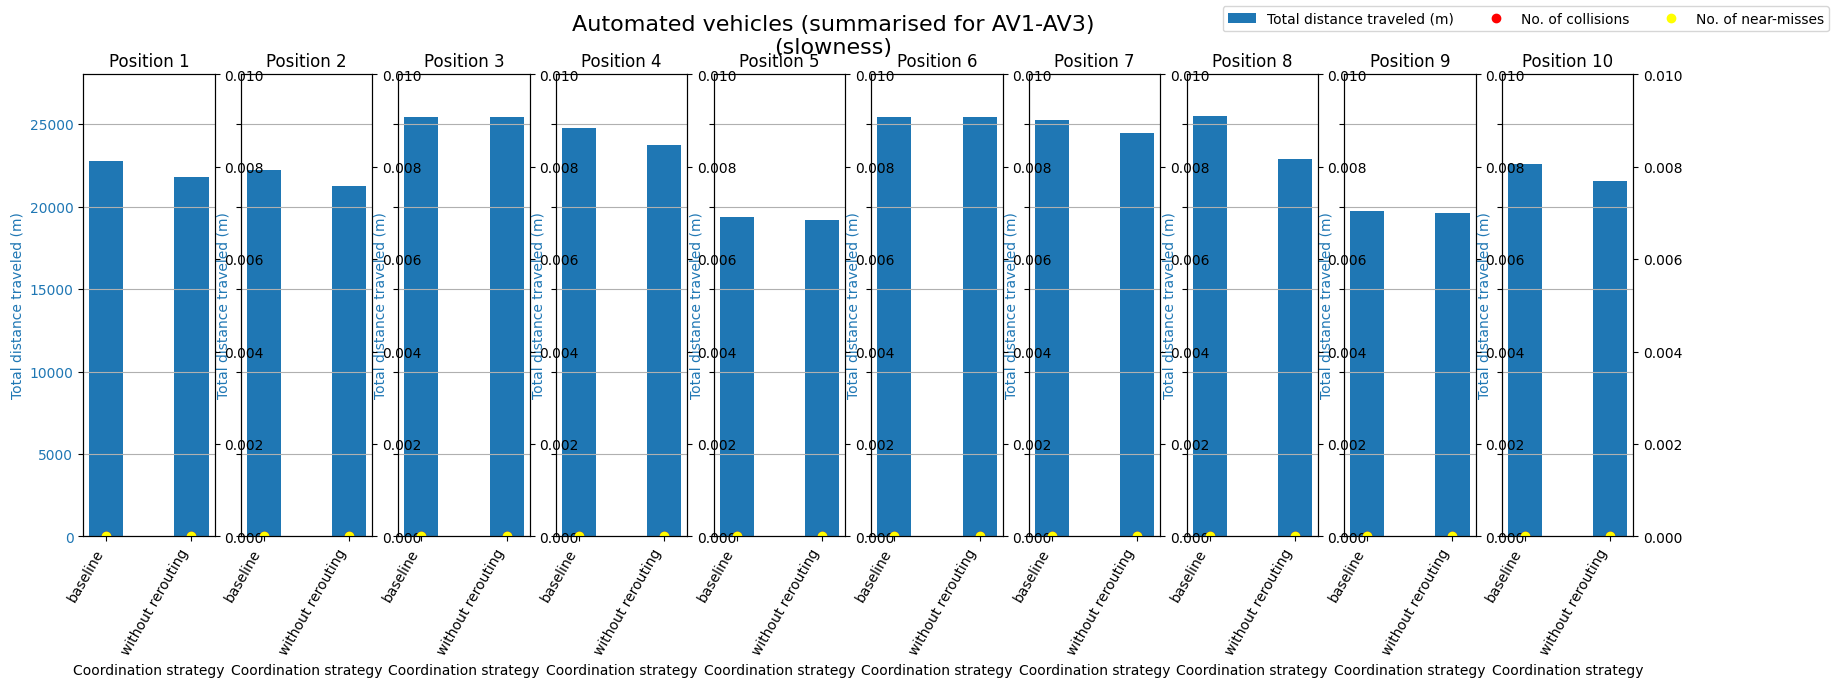

In [25]:
def save_and_show(fig, basename):  # to avoid inlining large image data into the notebook file
    filename = f'{DIRECTORY_DATA}/{basename}.png'
    fig.savefig(filename)
    
    # The `random` is because of https://stackoverflow.com/a/43640705.
    IPython.display.display(IPython.display.HTML(f'<img src="{filename}?{random.random()}" alt="{basename}" />'))
    
    plt.close(fig)
    
    return filename
    

def max_of_different(series: pd.Series) -> float:
    is_ok = series.nunique(dropna=False) == len(series)
    if not is_ok:
        print(series)
        raise ValueError('duplicate values')
    return series.max()
    

def find_misbehaviors(df_nonbaseline):
    if len(df_nonbaseline) == 0:
        return []
    
    misbehaviors = []
    
    probabilityForcingForHuman = 1.0
    misbehaviors.append(f'violation of priorities ({"random" if probabilityForcingForHuman < 1.0 else "constant"})')
        
    if same_value(df_nonbaseline['passhum']):
        misbehaviors.append('can pass first')
    
    if 'probabilitySlowingDownForHuman' in df_nonbaseline.columns:
        probabilitySlowingDownForHuman = float(same_value(df_nonbaseline['probabilitySlowingDownForHuman']))
        if probabilitySlowingDownForHuman > 0.0:
            misbehaviors.append(f'moving slowly ({"random" if probabilitySlowingDownForHuman < 1.0 else "constant"})')
    
    return misbehaviors


def make_subplots(ncols):
    return plt.subplots(1, ncols, figsize=(20, 6), sharey=True, squeeze=False)
    

def plot_title(df, *, title2):
    positions = df['position'].unique()
    fig, axes = make_subplots(len(positions))
    default_fig_width, default_fig_height = fig.get_size_inches()
    plt.close(fig)
    
    fig = plt.figure(figsize=(default_fig_width, 1))
    
    # misbehaviors = find_misbehaviors(df[df['forcing'] != 'no'])
    # title3 = 'Human (mis)behaviour actions: ' + ('none' if not misbehaviors else ', '.join(misbehaviors))
    # title3 = 'Human (mis)behaviour actions: TODO'
    # title = f'{title2}\n{title3}'
    
    title = f'{title2}'
    fig.suptitle(title, fontsize=16)
    
    fig.tight_layout()
    title1 = '.title'
    filename_png = save_and_show(fig, f'{title1}: {title2}')
    
    return filename_png
    
    
class Formula:
    def __init__(self, label, expression=None):
        self.label = label
        self.expression = expression if expression is not None else label
        
    def __str__(self):
        return self.label.replace('`', '')
    
    def __repr__(self):
        return f'<Formula: {self.label!r}>'
    
    def apply(self, df):
        if isinstance(self.expression, str):
            return df.eval(self.expression)
        return df.apply(self.expression, axis=1)
    
    
def add_categorical_classes(ax, n):
    """
    Add N classes to the x-axis with N-1 ticks in each class, excluding the class index.

    Parameters:
    ax (matplotlib.axes.Axes): The axis to modify.
    n (int): The number of classes (vehicles).
    """
    # Generate tick positions and labels for the primary x-axis
    primary_ticks = []
    primary_labels = []
    for i in range(n):
        start = i * (n - 1)
        ticks = [k for k in range(n) if k != i]  # Exclude the class index
        primary_ticks.extend(start + np.arange(len(ticks)))
        primary_labels.extend([str(tick) for tick in ticks])

    ax.set_xticks(primary_ticks)
    ax.set_xticklabels(primary_labels)

    # Add secondary x-axis for class annotations
    sec = ax.secondary_xaxis(location=0)

    # Define class boundaries and labels
    class_centers = [(i * (n - 1) + (n - 2) / 2) for i in range(n)]
    class_labels = [f"\n\n{i}" for i in range(n)]
    sec.set_xticks(class_centers, labels=class_labels)
    sec.tick_params('x', length=0)

    # Add another secondary x-axis for boundaries between classes
    sec2 = ax.secondary_xaxis(location=0)
    class_boundaries = np.arange(-0.5, n * (n - 1), n - 1)
    sec2.set_xticks(class_boundaries, labels=[])
    sec2.tick_params('x', length=40, width=1.5)

    # Adjust the axis limits
    ax.set_xlim(-0.5, n * (n - 1) - 0.5)
    
    
def plot_vertical_heatmap(ax, max_length, df, column):    
    cells = df[column]
    
    is_normalized = not column.endswith(' (non-normalized)')

    # Expand each list to have the same length
    expanded_data = []
    is_matrix = False
    id2score = {}
    sum_avs = 0
    len_avs = 0
    for id_vehicle, cell in zip(df.index.get_level_values('Vehicle ID'), cells):
        assert isinstance(cell, tuple)
        assert cell
        vectors: List[Tuple[float]] = []
        if isinstance(cell[0], float):
            vectors.append(cell)
            sum_cell = sum(cell)
            if id_vehicle != 0:
                sum_avs += sum_cell
                len_avs += len(cell)
            id2score[id_vehicle] = sum_cell / len(cell)
        else:
            assert isinstance(cell[0], tuple)
            is_matrix = True
            for j in range(len(cell[0])):
                vector = tuple(cell[i][j] for i in range(len(cell)))
                assert vector
                assert all(type(x) == type(vector[0]) for x in vector)
                if vector[0] is not None:
                    assert isinstance(vector[0], float)
                    vectors.append(vector)
        
        for vector in vectors:
            k_extra = max_length - len(cell)
            if is_normalized:
                assert k_extra == 0
            expanded_data.append(vector + (np.nan,) * k_extra)

    # Convert the expanded data to a 2D NumPy array
    data_array = np.array(expanded_data)

    # Transpose the data array to have heatmaps side-by-side (columns represent each row)
    data_array_transposed = data_array.T

    # Plot the heatmap - each column is a vertical slice now (grayscale, 0 is white, max is black)
    im = ax.imshow(data_array_transposed, aspect='auto', cmap='gray_r', interpolation='nearest')

    # Set labels for better readability
    labels_ids = list(df.index.get_level_values("Vehicle ID"))
    if not is_matrix:
        score_avs = sum_avs / len_avs
        ax.set_xlabel(f'Vehicle ID\nand score\n(AVs: {score_avs:.2f})')
        ax.set_xticks(np.arange(len(df.index)))
        ax.set_xticklabels([f'{i}\n{id2score.get(i):.2f}' for i in labels_ids])
    else:
        n_vehicles = len(labels_ids)
        assert labels_ids == list(range(n_vehicles))
        add_categorical_classes(ax, n_vehicles)
        ax.set_xlabel('\n\nVehicle ID')
    
    if is_normalized:
        ax.set_ylabel('Stage along the path')
        y_ticks = np.linspace(0, max_length - 1, 5)  # Set 5 evenly spaced ticks from 0 to max_length - 1
        ax.set_yticks(y_ticks)  # Apply these y-tick positions
        ax.set_yticklabels([f'{int((tick / (max_length - 1)) * 100)}%' for tick in y_ticks])  # Label ticks from 0% to 100%
    else:    
        ax.set_ylabel('Meters of the path')
        
        # Generate mask for NaN values
        nan_mask = np.isnan(data_array_transposed)
        
        # Adding rectangles around non-NaN regions for each column
        for col in range(data_array_transposed.shape[1]):
            nan_rows = np.where(nan_mask[:, col])[0]
            
            # Determine the start and end of non-NaN regions
            if len(nan_rows) == 0:
                # No NaN values in the column; entire column is non-NaN
                start_row = 0
                end_row = data_array_transposed.shape[0]
            else:
                # If there are NaNs, find the first occurrence
                start_row = 0
                end_row = nan_rows[0]
            
            # Draw rectangle around non-NaN values
            rect = Rectangle((col - 0.5, start_row - 0.5), 1, end_row - start_row, edgecolor='black', facecolor='none', linewidth=2)
            ax.add_patch(rect)
    
    # Return the image object for colorbar usage
    return im


def plot_lin(df, *, title2, column):
    #IPython.display.display(df)
    
    # Plot configuration
    positions = df['position'].unique()    
    fig, axes = make_subplots(len(positions))
    axes: list[list[Axes]]

    # Find the maximum length of rows
    max_length = max(
        max(df[df['position'] == position][column].apply(len))
        for position in positions
    )
    
    images = []
    for i, position in enumerate(positions):
        ax: Axes = axes[0][i]
        df_pos = df[df['position'] == position]
        images.append(plot_vertical_heatmap(ax, max_length, df_pos, column=column))
        ax.set_title(f'Position {position}')
    
    title1 = f'Paths segmentation based on CS density ({column})'
    column2description = {
        'Linearization': 'From the full simulation. Same as Linearization A.', 
        'Linearization A': 'From the short simulation. CS count: +1 for each CS.', 
        'Linearization B': "From the short simulation. For each CS: +1 / other's path length.", 
        'Linearization C': "From the short simulation. For each CS: + CS length / other's path length.", 
    }
    description = column2description.get(column)
    
    title = title1
    if description is not None:
        title += f'\n({description})'
    fig.suptitle(title, fontsize=16)
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    
    cax = fig.add_axes([0.85, 0.9, 0.1, 0.03])  # Adjust values to position the colorbar correctly
    fig.colorbar(
        images[0], cax=cax, label='Density',
        orientation='horizontal', location='top',
    )
    
    filename_png = save_and_show(fig, f'{title1}: {title2}')
    
    #print(id(df))
    #IPython.display.display(df)
    return filename_png, {}
    
    
def plot_aut_hum(df, *, name_key2df, title2, dfs_y1, dfs_y2, index_blocked_pos_strat, mode):
    #IPython.display.display(df)
    
    # Plot configuration
    positions = df['position'].unique()
    fig, axes = make_subplots(len(positions))
    axes: list[list[Axes]]
    bar_width = 0.4
 
    strategy2label = {'no': 'baseline\n(no human effect)', 'stops': 'stops (local)'}        

    formulas_y2_aut = [Formula('`No. of collisions`'), Formula('`No. of near-misses`')]
    colors_y2_aut = ['red', 'yellow']
    
    formulas_y2_hum = [Formula('`No. of violations`')] + formulas_y2_aut
    colors_y2_hum = ['black'] + colors_y2_aut
    
    formulas_y2_cmp = [Formula(f'`{col}` / `No. of violations`', 
                               lambda row, _col=col: row[_col] / row['No. of violations'] if row['No. of violations'] > 0 else 0)
                       for col in ('No. of collisions', 'No. of near-misses')]
    colors_y2_cmp = ['red', 'yellow']
    
    if mode.startswith('aut_') or mode == 'hum':
        if mode == 'aut_missions':
            column_y1 = 'No. of completed missions'
            color_y1 = 'tab:green'
        elif mode == 'aut_reroutingsAtParked':
            column_y1 = 'reroutingsAtParked'
            color_y1 = '#9467bd'  # violet
        elif mode == 'aut_reroutingsAtSlow':
            column_y1 = 'reroutingsAtSlow'
            color_y1 = '#9467bd'  # violet
        elif mode == 'aut_distance' or mode == 'hum':
            column_y1 = 'Total distance traveled (m)'
            color_y1 = 'tab:blue'
        else:
            raise ValueError(mode)
        
        if mode.startswith('aut_'):
            if mode == 'aut_reroutings':
                formulas_y2 = []
                colors_y2 = []
            else:
                formulas_y2 = formulas_y2_aut
                colors_y2 = colors_y2_aut
            id_vehicle_max = same_value(df['Vehicle ID'])
            title1 = f'Automated vehicles (summarised for AV1-AV{id_vehicle_max})' 
        else:
            assert mode == 'hum'
            formulas_y2 = formulas_y2_hum
            colors_y2 = colors_y2_hum
            title1 = 'Human-driven vehicle'
            
    elif mode == 'cmp':
        column_y1 = None
        color_y1 = None
        
        formulas_y2 = formulas_y2_cmp
        colors_y2 = colors_y2_cmp
        title1 = 'Collisions rate'
        
    else:
        raise ValueError(f'Unknown mode {mode}')
    
    # Get the global max values for consistent y-axis scaling
    if column_y1 is not None:
        y1_max = max(dfx[column_y1].max() for dfx in dfs_y1)
        y1_lim = y1_max * 1.1
        
    if mode == 'cmp':
        y2_lim = 2.0
    elif not formulas_y2:
        y2_lim = None
    else:
        y2_maxes = [formula.apply(dfx).max()
                    for dfx in dfs_y2
                    for formula in (formulas_y2 if mode == 'cmp' else set(formulas_y2_aut + formulas_y2_hum))]
        y2_max = max(y2_maxes)
        y2_lim = y2_max * 1.1
    
    pos2metstrat2value = {}
    handles = []
    
    is_forcing = name_key2df != 'slowness'
    
    # Iterate through each Positions variant
    for i, position in enumerate(positions):
        ax: Axes = axes[0][i]
        df_pos = df[df['position'] == position]
        df_pos = df_pos.sort_values(by='forcing' if is_forcing else 'slowness')
        pos2metstrat2value[position] = metstrat2value = {}
        
        # Bar positions for each Coordination strategy
        strategies = list(df_pos['forcing' if is_forcing else 'slowness'])
        #strategies.insert(0, strategies.pop(strategies.index('no')))
        x_positions = np.arange(len(strategies))
        ax.set_xlabel('Coordination strategy')
        
        def add_to_metstrat2value(metric, series):
            for strategy, value in zip(strategies, list(series)):
                metstrat2value[metric, strategy] = value
        
        # Plot bars
        handles.clear()
        if column_y1 is None:
            ax.set_yticks([])
        else:
            if mode == 'aut_missions':
                add_to_metstrat2value(column_y1, df_pos[column_y1])
            handles += [ax.bar(x_positions, df_pos[column_y1], width=bar_width, label=column_y1, color=color_y1)[0]]
            ax.set_ylabel(column_y1, color=color_y1)
            ax.tick_params(axis='y', labelcolor=color_y1)
            
            is_integer = mode.startswith('aut_rerouting') 
            if is_integer:
                ax.yaxis.set_major_locator(MaxNLocator(integer=True))
            
            if y1_lim == 0:
                y1_lim = 1 if is_integer else 0.001
            ax.set_ylim(0, y1_lim)
            
        if y2_lim is not None:
            # Create a secondary axis for the points
            ax_right = ax.twinx()
            
            # Plot points
            label2series = {str(formula): formula.apply(df_pos)
                            for formula in formulas_y2}
            for (label, series), color in zip(label2series.items(), colors_y2):
                if mode == 'cmp':
                    add_to_metstrat2value(label, series)
                handles.append(
                    ax_right.plot(
                        x_positions, series, label=label, marker='o', linestyle='', color=color
                    )[0]
                )
            ax_right.tick_params(axis='y', labelcolor='black')
            
            if y2_lim == 0:
                y2_lim = 0.01
            ax_right.set_ylim(0, y2_lim)
        
        # Add labels, grid, and title for each section
        ax.set_xticks(x_positions)
        #index_blocked_pos_strat
        ax.set_xticklabels([strategy2label.get(s, s) for s in strategies], rotation=60, ha='right')
        for xtick, strategy in zip(ax.get_xticklabels(), strategies):
            if not index_blocked_pos_strat[
                (index_blocked_pos_strat.get_level_values('position') == position) & (
                    (index_blocked_pos_strat.get_level_values('forcing') == strategy) &
                    (index_blocked_pos_strat.get_level_values('slowness') == 'no')
                    if is_forcing else
                    (index_blocked_pos_strat.get_level_values('slowness') == strategy) &
                    (index_blocked_pos_strat.get_level_values('forcing') == 'no')
                )
            ].empty:
                xtick.set_color('orange')
        ax.set_title(f'Position {position}')
        ax.grid(axis='y')
        
    fig.suptitle(f'{title1}\n({name_key2df})', fontsize=16)
    
    labels = [str(x) for x in [column_y1, *formulas_y2] if x is not None]
    fig.legend(handles=handles, labels=labels, ncol=len(handles), loc='upper right')
    
    fig.tight_layout()
    filename_png = save_and_show(fig, f'{title1}: {title2} ({mode}, {name_key2df})')
    
    #print(id(df))
    #IPython.display.display(df)    
    return filename_png, pos2metstrat2value


def compute_csd_score_average(series):
    sum_avs = 0
    len_avs = 0
    for (_conf, vehicle_id), lin in series.items():
        if vehicle_id != 0:
            sum_avs += sum(lin)
            len_avs += len(lin)
    return sum_avs / len_avs


def make_key2df(df):
    key2df = {}
    for are_bridges in True, False:
        for is_aut in None, True, False, 'conf':
            dfx = df[df['are_bridges'] == are_bridges]
            
            if is_aut is None or is_aut == 'conf':
                dfx = dfx.groupby(
                    ['configuration', 'Vehicle ID']
                ).agg({
                    col: same_value 
                    for col in dfx.columns 
                    if col.startswith('Linearization')
                    # and col not in ('Linearization', 'Linearization (non-normalized)')  # because old data is broken
                    or col in COLUMNS_CONFIGURATION
                })
                dfx = dfx.sort_values(by=COLUMNS_CONFIGURATION)
                
                if is_aut is None:
                    dfx['CSD score'] = dfx['Linearization C (non-normalized)'].map(lambda lin: sum(lin) / len(lin))
                else:
                    dfx = dfx.groupby('configuration').agg({
                        'are_bridges': same_value,
                        'i_map': same_value,
                        'position': same_value,
                        'Linearization C (non-normalized)': compute_csd_score_average,
                    }).rename(columns={
                        'Linearization C (non-normalized)': 'CSD score (AVs)',
                    })                
            else:
                dfx = dfx[dfx['Vehicle type'] == ('AutonomousVehicle' if is_aut else 'HumanDrivenVehicle')]
                dfx = dfx.groupby(
                    ['Scenario ID']
                ).agg({
                    **{col: 'sum' for col in dfx.columns},
                    **{col: max_of_different for col in ('Vehicle ID',)},
                    **{col: same_value for col in ('configuration', *COLUMNS_SCENARIO)},
                })
                dfx = dfx.sort_values(by=COLUMNS_SCENARIO)
                
            key2df[are_bridges, is_aut] = dfx      
            
    return key2df


def plot_df_map(df_map):
    key2df = make_key2df(df_map)        
            
    index_blocked, index_nonblocked = make_indexes_blocked_nonblocked(df_map, COLUMNS_SCENARIO)
    are_bridges_to_plotdicts = {}
    
    key2df_forcing_s_no = {key: df if 'slowness' not in df.columns else df[df['slowness'] == 'baseline']
                           for key, df in key2df.items()}
    key2df_forcing_s_wo = {key: df if 'slowness' not in df.columns else df[df['slowness'] == 'without rerouting']
                           for key, df in key2df.items()}
    key2df_forcing_s_wi = {key: df if 'slowness' not in df.columns else df[df['slowness'] == 'with rerouting']
                           for key, df in key2df.items()}
    key2df_slowness = {key: df if 'forcing' not in df.columns else df[df['forcing'] == 'baseline']
                       for key, df in key2df.items()}
    
    for are_bridges in False, True:
        if len(key2df[are_bridges, None]) == 0:
            continue
            
        filenames_png = [
            plot_title(
                key2df[are_bridges, True],
                title2=f"Map {I_MAP} ({'with' if are_bridges else 'without'} bridges)",
            )
        ]
        are_bridges_to_plotdicts[are_bridges] = plotdicts = []
        
        cols_lin = [
            col 
            for col in df_map 
            if re.match(
                r'''
                Linearization 
                (?:
                    [ ]
                    [ABCD]
                    # normalized 
                | 
                    [ ]
                    [CD]
                    [ ]
                    [(]non-normalized[)]
                )
                $
                ''', 
                col, 
                flags=re.VERBOSE,
            )
        ]
        
        modes = [
            *cols_lin,
            'aut_distance', 
            'aut_missions',  
            'hum', 
            'cmp',
            'aut_reroutingsAtSlow',
            'aut_reroutingsAtParked',
        ]
        
        for mode in modes:
            is_aut = mode.startswith('aut_')
            title2 = f"Map {I_MAP} ({'with' if are_bridges else 'without'} bridges)"
            
            if mode in cols_lin:
                list_key2df: list[tuple[dict, str | None]] = [
                    (key2df, None),
                ]
            elif mode.startswith('aut_rerouting'):
                list_key2df = [] if not are_bridges else [
                    (key2df_forcing_s_wo, 'without rerouting'),
                    (key2df_forcing_s_wi, 'with rerouting'),
                    (key2df_slowness, 'slowness'),
                ]
            else:
                list_key2df = [
                    (key2df_forcing_s_no, 'no slowness'),
                    (key2df_forcing_s_wo, 'without rerouting'),
                    (key2df_forcing_s_wi, 'with rerouting'),
                    (key2df_slowness, 'slowness'),
                ]
            
            for key2df_current, name_key2df in list_key2df:
                if mode.startswith('Linearization'):
                    filename_png, pos2metstrat2value = plot_lin(
                        key2df_current[are_bridges, None],
                        title2=title2,
                        column=mode,
                    )
                else:
                    df_current = key2df_current[are_bridges, is_aut]
                    assert df_current.empty == (not are_bridges and name_key2df == 'with rerouting')
                    if df_current.empty:
                        continue
                    filename_png, pos2metstrat2value = plot_aut_hum(
                        df_current,
                        name_key2df=name_key2df,
                        title2=title2, 
                        dfs_y1=[dfx for (_, is_aut_dfx), dfx in key2df.items() if is_aut_dfx == is_aut],
                        dfs_y2=[
                            key2df_current[are_bridges, is_aut_dfx] 
                            for is_aut_dfx in (
                                [is_aut] if mode == 'cmp' else [True, False]
                            )
                        ],
                        index_blocked_pos_strat=index_blocked[
                            index_blocked.get_level_values('are_bridges') == are_bridges
                        ],
                        mode=mode,
                    )
        
                filenames_png.append(filename_png)
                plotdicts.append(pos2metstrat2value)
            
        #IPython.display.display(dfx)
        filename_out_png = f'{DIRECTORY_DATA}/All: Map {I_MAP} (' + ('with' if are_bridges else 'without') + ' bridges).png'
        command_convert = ['convert', *filenames_png, '-append', filename_out_png]
        #print(f'{command_convert=}')
        assert len(set(filenames_png)) == len(filenames_png)
        subprocess.run(command_convert, check=True)
        #print(plotdicts)
        
    return merge_are_bridges_to_plotdicts(are_bridges_to_plotdicts)
    
        
def merge_are_bridges_to_plotdicts(are_bridges_to_plotdicts):
    merged_data = {}
    for are_bridges, plotdicts in are_bridges_to_plotdicts.items():
        for pos_dict in plotdicts:
            if are_bridges not in merged_data:
                merged_data[are_bridges] = {}
            for pos, metric_strat_dict in pos_dict.items():
                if pos not in merged_data[are_bridges]:
                    merged_data[are_bridges][pos] = {}
                merged_data[are_bridges][pos].update(metric_strat_dict)
                
    # Step 2: Extract all unique keys for indexing
    all_are_bridges = sorted(merged_data.keys())
    all_positions = sorted({pos for are_val in merged_data.values() for pos in are_val.keys()})
    all_pairs = [pair 
                 for are_val in merged_data.values() 
                 for pos_val in are_val.values() 
                 for pair in pos_val.keys()]
    
    unique_metrics = list({m: None for (m, s) in all_pairs})
    unique_strategies = list({s: None for (m, s) in all_pairs})
    
    # Step 3: Create MultiIndex for rows and columns
    row_index = pd.MultiIndex.from_product([[I_MAP], all_are_bridges, all_positions], names=["map", "are_bridges", "position"])
    col_index = pd.MultiIndex.from_product([unique_metrics, unique_strategies], names=["metric", "strategy"])
    
    # Step 4: Create the DataFrame
    df = pd.DataFrame(index=row_index, columns=col_index)
    
    # Step 5: Fill the DataFrame
    for are_val, pos_dict in merged_data.items():
        for pos, metric_strat_dict in pos_dict.items():
            for (m, s), val in metric_strat_dict.items():
                df.loc[(I_MAP, are_val, pos), (m, s)] = val
    
    return df
            

df_plotdicts = plot_df_map(df_map)
#df_plotdicts

In [ ]:
#IPython.display.display(IPython.display.HTML(df_plotdicts.to_html()))
df_plotdicts.to_csv(f'{DIRECTORY_DATA}/df_plotdicts_map{I_MAP}.csv')
print(df_plotdicts.columns)
print(df_plotdicts.index)

In [ ]:
df_plotdicts

# Screenshots of positions

In [ ]:
def show_maps(title, configurations, ncols): 
    nrows = max(1, (len(configurations) + ncols - 1) // ncols)
    fig, axes_matrix = plt.subplots(nrows, ncols, figsize=(16, 9), squeeze=False)
    #print(f'{title}: {nrows}x{ncols}')

    axes = list(itertools.chain.from_iterable(axes_matrix))
    axes_matrix: list[list[Axes]]
    assert len(axes) >= len(configurations)
    
    for ax in axes:
        ax.axis('off')
        
    for ax, configuration in zip(axes, configurations):
        filename_screenshot = configuration_to_filename_screenshot[configuration]
        image = plt.imread(filename_screenshot)
        ax.imshow(image)
        ax.title.set_text(f'Configuration:\n{configuration}')
    
    fig.suptitle(title, fontsize=16)    
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.1, hspace=0.3)
    save_and_show(fig, title)
    

def show_all_maps():
    index_blocked, index_nonblocked = make_indexes_blocked_nonblocked(df_map, ['configuration', *COLUMNS_CONFIGURATION])
    for title, index in {'Non-blocked': index_nonblocked, 'Blocked': index_blocked}.items():
        for are_bridges in True, False:
            show_maps(f'{title}: Map {I_MAP} ({"with" if are_bridges else "without"} bridges)', 
                      index[index.get_level_values('are_bridges') == are_bridges].get_level_values('configuration'), 
                      4)
            

show_all_maps()

# Preparing data for plots of different runs and maps 

In [26]:
def pickle_key2df(df_all):
    key2df = make_key2df(df_all)
    with open(f'{RUNDIR}/key2df.pickle', 'wb') as file:
        pickle.dump(key2df, file)
        

pickle_key2df(df_all)